In [42]:
# 引入模組
import torch
from torchvision import datasets
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

# Define the path to save the dataset
data_path = 'data'
transform = transforms.ToTensor()
cifar10_train = CIFAR10(root=data_path, train=True, download=True, transform=transform)
cifar10_test = CIFAR10(root=data_path, train=False, download=True, transform=transform)

print(f"Training dataset size: {len(cifar10_train)}")
print(f"Test dataset size: {len(cifar10_test)}")
print("MNIST dataset downloaded successfully.")

Training dataset size: 50000
Test dataset size: 10000
MNIST dataset downloaded successfully.


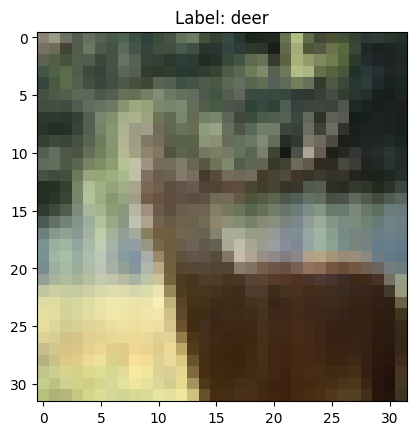

In [43]:
# 看看看資料集有多大和它的內容
import matplotlib.pyplot as plt
import random

# 隨機選一張
idx = random.randint(0, len(cifar10_train) - 1)
image, label = cifar10_train[idx]   # image 是 [3, 32, 32] tensor
image = image.permute(1, 2, 0).numpy() # 轉換成 numpy 並調整維度 [H, W, C]

# 顯示
plt.imshow(image)
plt.title(f"Label: {cifar10_train.classes[label]}")  # 轉成文字標籤
plt.show()

In [ ]:
# 設計模型
import torch

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.fc = torch.nn.Sequential(
            # 輸入通道數3個因為 CIFAR-10 是 RGB
            torch.nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  # 32x32 -> 32x32
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),  # 32x32 -> 16x16

            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # 16x16 -> 16x16
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),  # 16x16 -> 8x8

            torch.nn.Flatten(),
            torch.nn.Linear(64 * 8 * 8, 128),  # 64*8*8 = 4096
            torch.nn.ReLU(),
            torch.nn.Linear(128, 10)  # CIFAR-10 有 10 類
        )

    def forward(self, x):
        out = self.fc(x)
        return out


In [ ]:
# dataloader
from torch.utils.data import TensorDataset, DataLoader
train_loader = DataLoader(cifar10_train, batch_size=64, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=64, shuffle=False)

# Train the model(有進度條，準確率換算成百分比)
from tqdm import tqdm

model = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
for epoch in range(50):
    total_loss = 0.0
    total_hit = 0
    for batch_X, batch_y in tqdm(train_loader, total=len(train_loader)):
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_hit += torch.sum(batch_y == torch.argmax(outputs, dim=1)).item()
    train_loss = total_loss / len(train_loader)
    train_accuracy = total_hit / len(train_loader.dataset)


    total_loss = 0.0
    total_hit = 0
    with torch.no_grad():
        for batch_X, batch_y in tqdm(test_loader, total=len(test_loader)):
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            total_loss += loss.item()
            total_hit += torch.sum(batch_y == torch.argmax(outputs, dim=1)).item()
    test_loss = total_loss / len(test_loader)
    test_accuracy = total_hit / len(test_loader.dataset)
    print(f"Epoch [{epoch+1:3d}/50], Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f} Val Loss: {test_loss:.4f}, Val Accuracy: {test_accuracy:.4f}")

#最佳結果，準確率約70%
#Epoch [ 47/100], Train Loss: 0.6077, Accuracy: 0.7921 Val Loss: 0.8931, Val Accuracy: 0.7039


100%|██████████| 157/157 [00:02<00:00, 61.29it/s]


Epoch [  1/100], Train Loss: 1.8122, Accuracy: 0.3612 Val Loss: 1.5841, Val Accuracy: 0.4408


100%|██████████| 157/157 [00:02<00:00, 59.61it/s]


Epoch [  2/100], Train Loss: 1.5347, Accuracy: 0.4566 Val Loss: 1.4577, Val Accuracy: 0.4816


100%|██████████| 157/157 [00:02<00:00, 55.44it/s]


Epoch [  3/100], Train Loss: 1.4235, Accuracy: 0.4959 Val Loss: 1.3634, Val Accuracy: 0.5197


100%|██████████| 157/157 [00:02<00:00, 55.13it/s]


Epoch [  4/100], Train Loss: 1.3458, Accuracy: 0.5235 Val Loss: 1.3072, Val Accuracy: 0.5396


100%|██████████| 157/157 [00:02<00:00, 55.26it/s]


Epoch [  5/100], Train Loss: 1.2879, Accuracy: 0.5454 Val Loss: 1.2621, Val Accuracy: 0.5563


100%|██████████| 157/157 [00:02<00:00, 54.92it/s]


Epoch [  6/100], Train Loss: 1.2406, Accuracy: 0.5650 Val Loss: 1.2238, Val Accuracy: 0.5709


100%|██████████| 157/157 [00:02<00:00, 55.29it/s]


Epoch [  7/100], Train Loss: 1.2006, Accuracy: 0.5783 Val Loss: 1.1917, Val Accuracy: 0.5795


100%|██████████| 157/157 [00:02<00:00, 54.54it/s]


Epoch [  8/100], Train Loss: 1.1653, Accuracy: 0.5910 Val Loss: 1.1622, Val Accuracy: 0.5898


100%|██████████| 157/157 [00:02<00:00, 55.64it/s]


Epoch [  9/100], Train Loss: 1.1337, Accuracy: 0.6027 Val Loss: 1.1318, Val Accuracy: 0.6059


100%|██████████| 157/157 [00:02<00:00, 55.81it/s]


Epoch [ 10/100], Train Loss: 1.1034, Accuracy: 0.6124 Val Loss: 1.1158, Val Accuracy: 0.6046


100%|██████████| 157/157 [00:02<00:00, 55.89it/s]


Epoch [ 11/100], Train Loss: 1.0742, Accuracy: 0.6244 Val Loss: 1.0850, Val Accuracy: 0.6229


100%|██████████| 157/157 [00:02<00:00, 56.19it/s]


Epoch [ 12/100], Train Loss: 1.0508, Accuracy: 0.6333 Val Loss: 1.0672, Val Accuracy: 0.6272


100%|██████████| 157/157 [00:02<00:00, 55.99it/s]


Epoch [ 13/100], Train Loss: 1.0253, Accuracy: 0.6410 Val Loss: 1.0485, Val Accuracy: 0.6313


100%|██████████| 157/157 [00:02<00:00, 55.95it/s]


Epoch [ 14/100], Train Loss: 1.0050, Accuracy: 0.6486 Val Loss: 1.0452, Val Accuracy: 0.6310


100%|██████████| 157/157 [00:02<00:00, 55.00it/s]


Epoch [ 15/100], Train Loss: 0.9825, Accuracy: 0.6572 Val Loss: 1.0260, Val Accuracy: 0.6458


100%|██████████| 157/157 [00:02<00:00, 57.28it/s]


Epoch [ 16/100], Train Loss: 0.9644, Accuracy: 0.6646 Val Loss: 1.0129, Val Accuracy: 0.6474


100%|██████████| 157/157 [00:02<00:00, 55.85it/s]


Epoch [ 17/100], Train Loss: 0.9469, Accuracy: 0.6695 Val Loss: 0.9977, Val Accuracy: 0.6508


100%|██████████| 157/157 [00:02<00:00, 55.55it/s]


Epoch [ 18/100], Train Loss: 0.9278, Accuracy: 0.6781 Val Loss: 0.9857, Val Accuracy: 0.6573


100%|██████████| 157/157 [00:02<00:00, 55.74it/s]


Epoch [ 19/100], Train Loss: 0.9135, Accuracy: 0.6840 Val Loss: 0.9762, Val Accuracy: 0.6631


100%|██████████| 157/157 [00:02<00:00, 52.52it/s]


Epoch [ 20/100], Train Loss: 0.8939, Accuracy: 0.6884 Val Loss: 0.9919, Val Accuracy: 0.6596


100%|██████████| 157/157 [00:02<00:00, 55.06it/s]


Epoch [ 21/100], Train Loss: 0.8817, Accuracy: 0.6922 Val Loss: 0.9632, Val Accuracy: 0.6658


100%|██████████| 157/157 [00:02<00:00, 54.80it/s]


Epoch [ 22/100], Train Loss: 0.8690, Accuracy: 0.6969 Val Loss: 0.9928, Val Accuracy: 0.6612


100%|██████████| 157/157 [00:02<00:00, 54.46it/s]


Epoch [ 23/100], Train Loss: 0.8523, Accuracy: 0.7050 Val Loss: 0.9436, Val Accuracy: 0.6738


100%|██████████| 157/157 [00:02<00:00, 56.70it/s]


Epoch [ 24/100], Train Loss: 0.8418, Accuracy: 0.7078 Val Loss: 0.9389, Val Accuracy: 0.6776


100%|██████████| 157/157 [00:02<00:00, 54.63it/s]


Epoch [ 25/100], Train Loss: 0.8275, Accuracy: 0.7113 Val Loss: 0.9353, Val Accuracy: 0.6777


100%|██████████| 157/157 [00:02<00:00, 55.12it/s]


Epoch [ 26/100], Train Loss: 0.8159, Accuracy: 0.7165 Val Loss: 0.9435, Val Accuracy: 0.6753


100%|██████████| 157/157 [00:02<00:00, 55.56it/s]


Epoch [ 27/100], Train Loss: 0.8052, Accuracy: 0.7215 Val Loss: 0.9319, Val Accuracy: 0.6779


100%|██████████| 157/157 [00:02<00:00, 54.22it/s]


Epoch [ 28/100], Train Loss: 0.7936, Accuracy: 0.7253 Val Loss: 0.9219, Val Accuracy: 0.6828


100%|██████████| 157/157 [00:02<00:00, 54.75it/s]


Epoch [ 29/100], Train Loss: 0.7797, Accuracy: 0.7292 Val Loss: 0.9415, Val Accuracy: 0.6801


100%|██████████| 157/157 [00:02<00:00, 53.34it/s]


Epoch [ 30/100], Train Loss: 0.7716, Accuracy: 0.7322 Val Loss: 0.9173, Val Accuracy: 0.6826


100%|██████████| 157/157 [00:02<00:00, 53.28it/s]


Epoch [ 31/100], Train Loss: 0.7588, Accuracy: 0.7368 Val Loss: 0.9113, Val Accuracy: 0.6879


100%|██████████| 157/157 [00:02<00:00, 54.04it/s]


Epoch [ 32/100], Train Loss: 0.7490, Accuracy: 0.7403 Val Loss: 0.9263, Val Accuracy: 0.6835


100%|██████████| 157/157 [00:02<00:00, 54.49it/s]


Epoch [ 33/100], Train Loss: 0.7392, Accuracy: 0.7453 Val Loss: 0.9051, Val Accuracy: 0.6946


100%|██████████| 157/157 [00:03<00:00, 52.15it/s]


Epoch [ 34/100], Train Loss: 0.7257, Accuracy: 0.7488 Val Loss: 0.9025, Val Accuracy: 0.6898


100%|██████████| 157/157 [00:02<00:00, 55.70it/s]


Epoch [ 35/100], Train Loss: 0.7186, Accuracy: 0.7523 Val Loss: 0.8988, Val Accuracy: 0.6891


100%|██████████| 157/157 [00:02<00:00, 56.13it/s]


Epoch [ 36/100], Train Loss: 0.7067, Accuracy: 0.7566 Val Loss: 0.9261, Val Accuracy: 0.6870


100%|██████████| 157/157 [00:02<00:00, 54.91it/s]


Epoch [ 37/100], Train Loss: 0.6987, Accuracy: 0.7588 Val Loss: 0.8993, Val Accuracy: 0.6951


100%|██████████| 157/157 [00:02<00:00, 55.14it/s]


Epoch [ 38/100], Train Loss: 0.6885, Accuracy: 0.7629 Val Loss: 0.8982, Val Accuracy: 0.6950


100%|██████████| 157/157 [00:02<00:00, 54.89it/s]


Epoch [ 39/100], Train Loss: 0.6796, Accuracy: 0.7666 Val Loss: 0.8933, Val Accuracy: 0.6967


100%|██████████| 157/157 [00:02<00:00, 54.56it/s]


Epoch [ 40/100], Train Loss: 0.6690, Accuracy: 0.7702 Val Loss: 0.9002, Val Accuracy: 0.6980


100%|██████████| 157/157 [00:02<00:00, 54.63it/s]


Epoch [ 41/100], Train Loss: 0.6598, Accuracy: 0.7737 Val Loss: 0.8881, Val Accuracy: 0.7004


100%|██████████| 157/157 [00:02<00:00, 52.54it/s]


Epoch [ 42/100], Train Loss: 0.6492, Accuracy: 0.7787 Val Loss: 0.9031, Val Accuracy: 0.6952


100%|██████████| 157/157 [00:02<00:00, 55.21it/s]


Epoch [ 43/100], Train Loss: 0.6419, Accuracy: 0.7805 Val Loss: 0.9036, Val Accuracy: 0.6970


100%|██████████| 157/157 [00:03<00:00, 49.75it/s]


Epoch [ 44/100], Train Loss: 0.6354, Accuracy: 0.7813 Val Loss: 0.9183, Val Accuracy: 0.6963


100%|██████████| 157/157 [00:03<00:00, 50.18it/s]


Epoch [ 45/100], Train Loss: 0.6248, Accuracy: 0.7869 Val Loss: 0.8952, Val Accuracy: 0.6976


100%|██████████| 157/157 [00:02<00:00, 55.73it/s]


Epoch [ 46/100], Train Loss: 0.6168, Accuracy: 0.7880 Val Loss: 0.8933, Val Accuracy: 0.6996


100%|██████████| 157/157 [00:02<00:00, 57.66it/s]


Epoch [ 47/100], Train Loss: 0.6077, Accuracy: 0.7921 Val Loss: 0.8931, Val Accuracy: 0.7039


100%|██████████| 157/157 [00:02<00:00, 57.03it/s]


Epoch [ 48/100], Train Loss: 0.5974, Accuracy: 0.7962 Val Loss: 0.9229, Val Accuracy: 0.6931


100%|██████████| 157/157 [00:02<00:00, 55.03it/s]


Epoch [ 49/100], Train Loss: 0.5912, Accuracy: 0.7978 Val Loss: 0.8922, Val Accuracy: 0.7022


100%|██████████| 157/157 [00:02<00:00, 56.49it/s]

Epoch [ 50/100], Train Loss: 0.5818, Accuracy: 0.8022 Val Loss: 0.8918, Val Accuracy: 0.7017
